<a href="https://colab.research.google.com/github/prakashdassr/Simple-MNIST-NN-from-scratch/blob/main/learnthedlfromscratch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LearnTheDLFromScratch - 001

I developed this Project to Get into the Deeplearing and Machine Learning. Kindy do contact me if any helps or suggestions needed. <br>
* [LinkedIn](https://www.linkedin.com/in/prakash-rr/)
* [GitHub](https://github.com/prakash02100)

The MNIST handwritten digit database is a large collection of handwritten digits, consisting of a training set of 60,000 examples and a test set of 10,000 examples.2 It was constructed from NIST's Special Database 3 and Special Database 1, which contain binary images of handwritten digits.1 SD-3 is cleaner and easier to recognize than SD-1. The MNIST dataset is a popular dataset in the field of image processing and is often used for benchmarking machine learning algorithms.0

> MNIST stands for Modified National Institute of Standards and Technology.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [ ]:
data = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0




**Writing the Formula's**

**I'm working with a NumPy array and preparing the data for machine learning by splitting it into a development set (dev) and a training set. I'm preprocessing the data by normalizing the input features. Let me explain the code step by step**

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
# We should shuffle the data before splitting into development or training sets

data_dev = data[0:1000].T
# We are taking Transpose bcoz we are taking rows as example rather then columns
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

# . is used to ensure that the division operation is performed as a floating-point division

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

**X_dev = X_dev / 255.: This line normalizes the feature values by dividing them by 255. This is a common preprocessing step for images when pixel values are typically in the range [0, 255] to scale them to a range between 0 and 1.**

In [ ]:
Y_train

array([7, 1, 1, ..., 9, 8, 5])


[**Took From Samsons Note For Understanding the Formulas**](https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras)

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [ ]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1,b1,w2,b2

*Rectified Linear Unit (ReLU) activation *

Math Functions Down Here

In [ ]:
def ReLU(Z):
    return np.maximum(Z,0)

def SoftMax(Z):
    return np.exp(Z) / sum(np.exp(Z))
    # exp(Z) # to calculate the exponential function

def ReLU_derivative(Z):
    return Z > 0 # returns 0 or 1

**"One-hot encoding" is a technique used in data preprocessing, primarily in the context of categorical data, to represent categorical variables as binary vectors.**

In [ ]:
def one_hot(Y):
    oh_Y = np.zeros((Y.size, Y.max()+1))
    oh_Y[np.arange(Y.size), Y] = 1
    return oh_Y.T

In [ ]:
def forward_prop(w1,b1,w2,b2,X):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = SoftMax(z2)
    return z1,a1,z2,a2

def backward_prop(z1,a1,z2,a2,w1,w2,X,Y):
    one_hot_Y = one_hot(Y)
    dz2 = a2 - one_hot_Y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * ReLU_derivative(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)
    return dw1,db1,dw2,db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1,b1,w2,b2

In [ ]:
def return_class(a):
    return np.argmax(a,0) # o find the index (or indices) of the maximum value in an array

def accuracy_score(prediction,Y):
    print(prediction, Y)
    return np.sum(prediction == Y) / Y.size

def gradient_descent(X, Y,alpha,n_of_itr):
    w1,b1,w2,b2 = init_params()
    for i in range(n_of_itr):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2 = backward_prop(z1,a1,z2,a2,w1,w2,X,Y)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i % 50 == 0:
            print('Iteration No :  ',i)
            prediction = return_class(a2)
            print(accuracy_score(prediction, Y))
    return w1,b1,w2,b2

In [ ]:
w1,b1,w2,b2 = gradient_descent(X_train,Y_train, 0.10,1300)

Iteration No :   0
[9 7 7 ... 7 7 7] [7 1 1 ... 9 8 5]
0.09101011223469274
Iteration No :   50
[0 1 1 ... 6 8 8] [7 1 1 ... 9 8 5]
0.37193021446827423
Iteration No :   100
[9 1 1 ... 2 4 5] [7 1 1 ... 9 8 5]
0.5080564507167463
Iteration No :   150
[7 1 1 ... 4 4 5] [7 1 1 ... 9 8 5]
0.6630736748527614
Iteration No :   200
[7 1 1 ... 4 4 5] [7 1 1 ... 9 8 5]
0.7216357373041449
Iteration No :   250
[7 1 1 ... 4 4 5] [7 1 1 ... 9 8 5]
0.7563062562506945
Iteration No :   300
[7 1 1 ... 4 8 5] [7 1 1 ... 9 8 5]
0.784198244249361
Iteration No :   350
[7 1 1 ... 4 8 5] [7 1 1 ... 9 8 5]
0.8074230470052228
Iteration No :   400
[7 1 1 ... 4 8 5] [7 1 1 ... 9 8 5]
0.8232025780642294
Iteration No :   450
[7 1 1 ... 4 8 5] [7 1 1 ... 9 8 5]
0.8388709856650739
Iteration No :   500
[7 1 1 ... 4 8 5] [7 1 1 ... 9 8 5]
0.8490943438159796
Iteration No :   550
[7 1 1 ... 4 8 5] [7 1 1 ... 9 8 5]
0.8564284920546728
Iteration No :   600
[7 1 1 ... 4 8 5] [7 1 1 ... 9 8 5]
0.8626514057117457
Iteration No :

In [ ]:
def make_predictions(w1, b1, w2, b2,X):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, X)
    predictions = return_class(a2)
    return predictions

def test_prediction(w1, b1, w2, b2,i):
    img_data = X_train[:, i, None]
    prediction = make_predictions(w1, b1, w2, b2,X_train[:, i, None])
    label = Y_train[i]
    print("Prediction: ", prediction)
    print("Label: ", label)

    img_data = img_data.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(img_data, interpolation='nearest')
    plt.show()

Example Prediction 
Prediction:  [2]
Label:  2


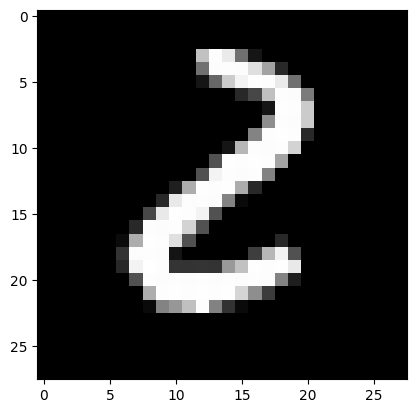

In [ ]:
print('Example Prediction ')
test_prediction(w1, b1, w2, b2,8)

Enter an index to test the model10
Prediction:  [7]
Label:  7


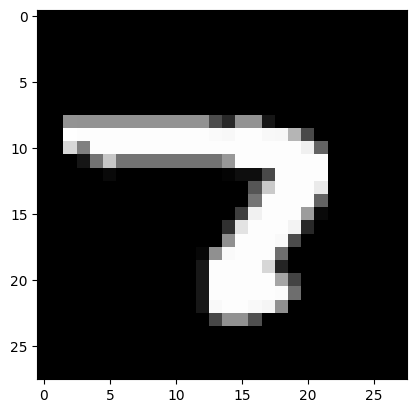

In [ ]:
test_prediction(w1, b1, w2, b2,int(input('Enter an index to test the model')))